# Benchmarking the different inversion methods

<cite data-cite="1960237/TBN6W5IG"></cite>

In [1]:
import sys
sys.path.append('../src')
import time
import numpy as np
import matplotlib.pyplot as plt
from emagpy import Problem

datadir = '../src/examples/'
timings = {}

2/30 data removed (filterRange).


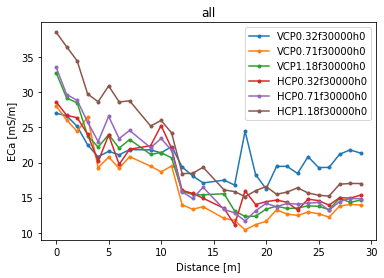

In [2]:
k = Problem()
k.createSurvey(datadir + 'cover-crop/coverCropTransect.csv')
k.filterRange(vmax=50)
k.show()
k.setInit(depths0=np.linspace(0.1, 2, 10))

In [3]:
t0 = time.time()
k.invert(forwardModel='CSgn')
timings['CSgn'] = [time.time() - t0, np.mean(k.misfits[0])]

t0 = time.time()
k.invert(forwardModel='CS', method='L-BFGS-B', regularization='l2')
timings['CS-L-BFGS-B'] = [time.time() - t0, np.mean(k.misfits[0])]

t0 = time.time()
k.invert(forwardModel='CS', method='Gauss-Newton', regularization='l2')
timings['CS-GN'] = [time.time() - t0, np.mean(k.misfits[0])]

Survey 1/1
28/28 inverted
28/28 invertedSurvey 1/1
28/28 inverted


In [4]:
k.surveys[0].df = k.surveys[0].df[:4]

t0 = time.time()
k.invert(forwardModel='FSlin', method='L-BFGS-B', regularization='l2', njobs=-1)
timings['FSlin-L-BFGS-B'] = [time.time() - t0, np.mean(k.misfits[0])]

t0 = time.time()
k.invert(forwardModel='FSlin', method='Gauss-Newton', regularization='l2')
timings['FSlin-GN'] = [time.time() - t0, np.mean(k.misfits[0])]

100%|██████████| 4/4 [00:00<00:00, 44.04it/s]


4/4 inverted

In [5]:
t0 = time.time()
k.invert(forwardModel='FSeq', method='L-BFGS-B', regularization='l2', njobs=-1)
timings['FSeq-L-BFGS-B'] = [time.time() - t0, np.mean(k.misfits[0])]

100%|██████████| 4/4 [00:00<00:00, 249.60it/s]


In [6]:
t0 = time.time()
k.invert(forwardModel='FSeq', method='Gauss-Newton', regularization='l2')
timings['FSeq-GN'] = [time.time() - t0, np.mean(k.misfits[0])]

4/4 inverted

In [7]:
for key in timings:
    print('{:15s}: {:2.3f} s, RRMSE {:2.2f} %'.format(key, *timings[key]))

CSgn           : 0.169 s, RRMSE 9.32 %
CS-L-BFGS-B    : 4.150 s, RRMSE 8.81 %
CS-GN          : 0.070 s, RRMSE 9.32 %
FSlin-L-BFGS-B : 12.831 s, RRMSE 4.05 %
FSlin-GN       : 1.489 s, RRMSE 4.27 %
FSeq-L-BFGS-B  : 36.659 s, RRMSE 29.51 %
FSeq-GN        : 2.839 s, RRMSE 3.88 %


Timing, depends on the type of forward model, the method chosen and the number of parameters of the model (number of layers and depths).